In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

path = "/content/drive/MyDrive/ImageProcessing/Assignment-23"

In [127]:
#-------directory

list_of_subjects = os.listdir(os.path.join(path, "MNIST_persian"))
list_of_subjects.sort()

list_of_numbers = os.listdir(os.path.join(path, "MNIST_persian/", list_of_subjects[0]))
list_of_numbers.sort()

for i in range(len(list_of_numbers)):
    numbers = []
    for j in range(len(list_of_subjects)):

        number = cv2.imread(os.path.join(path, "MNIST_persian", list_of_subjects[j], list_of_numbers[i]))
        numbers.append(number)

    directory = os.path.join(path, "Result/MNIST_persian/", f"numbers_{i}")

    if not os.path.exists(directory):
        os.makedirs(directory)

    for k in range(len(numbers)):
        cv2.imwrite(os.path.join(directory, f"{k+1}_" + list_of_numbers[i]), numbers[k])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


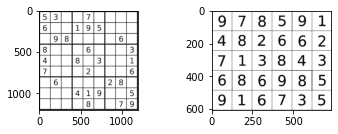

In [4]:
#-------sudoku, crop margin and crop blocks whit numbers

image = cv2.imread(os.path.join(path, "Inputs/" + "sudoku.tif"))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(2,2,3).imshow(image_gray, cmap = 'gray')

image_gray = cv2.equalizeHist(image_gray)

thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 57, 5)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

for cnt in contours:

    area = cv2.contourArea(cnt)

    if area < 5000:

        cv2.drawContours(thresh, [cnt], -1, (0,0,0), -1)

copy_thresh = 255 - thresh
numbers = cv2.subtract(copy_thresh, image_gray)


block_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
block_contours = block_contours[0] if len(block_contours) == 2 else block_contours[1]

blocks_whit_numbers = []

for cnt in block_contours:

    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)

    if area > 20000:

        cropped_margin = image_gray[y : y + h, x : x + w]
        cv2.imwrite(os.path.join(path, "Result/" + "cropped_margin.jpg"), cropped_margin)
        plt.subplot(2,2,3).imshow(cropped_margin, cmap = 'gray')

    elif area < 20000:
     
        ROI = numbers[y : y + h, x : x + w]
        non_zeros_pixel = np.stack(np.nonzero(ROI), axis = 1)

        if len(non_zeros_pixel) > 100:

            Non_empty_block = image_gray[y : y + h, x : x + w] 
            blocks_whit_numbers.append(Non_empty_block)


h_min = min(im.shape[0] for im in blocks_whit_numbers)
w_min = min(im.shape[1] for im in blocks_whit_numbers)                      

blocks_whit_numbers = [cv2.resize(im, (w_min, h_min)) for im in blocks_whit_numbers]                      

result = []
for i in range(0, len(blocks_whit_numbers), 6):

    im = cv2.hconcat((blocks_whit_numbers[i: i + 6]))
    result.append(im)

result = cv2.vconcat((result[:]))
cv2.imwrite(os.path.join(path, "Result/" + "block_whit_number.jpg"), result)

plt.subplot(2,2,4).imshow(result, cmap = 'gray')


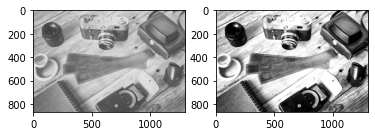

In [3]:
#-----------Contrast Enhancement

from PIL import Image
from PIL import Image, ImageEnhance

"""
factor = 1 given original image
factor > 1 increase contrast
factor < 1 decrease constrast

"""

image = Image.open(os.path.join(path, "Inputs/" + "ImageEnhance.jpg"))
plt.subplot(1,2,1).imshow(image, cmap = "gray")

enhancer = ImageEnhance.Contrast(image)

factor = 2 
im_output = enhancer.enhance(factor)

plt.subplot(1,2,2).imshow(im_output, cmap = "gray")

im_output.save(os.path.join(path, "Result/" + "Contrast_adjustment.jpg"))